the data

In [294]:
x_data = [1.0, 2.0, 2.8, 3.8, 4.6, 5.4, 6.4, 6.8]
y_data = [-4.210, -7.798, -9.664, -9.790, -7.410, -2.125, 9.691, 16.373]

arbitrary order numerical derivative

In [295]:
def deri(f, x, n, h=0.2):
    if n == 1:
        return (f(x + h) - f(x)) / h
    else:
        return (deri(f, x + h, n - 1) - deri(f, x, n - 1) / h)

the product function

In [296]:
def prod(x, x_k):
    result = 1
    for k in x_k:
        result *= (x - k)
    return result

define lagrange interpolation

In [297]:
def lagrange_interpolation(x_values, y_values):
    def polynomial(x):
        total = 0
        n = len(x_values)
        for i in range(n):
            xi, yi = x_values[i], y_values[i]

            def g(i, n):
                tot_mul = 1
                for j in range(n):
                    if i != j:
                        xj = x_values[j]
                        tot_mul *= (x - xj) / (xi - xj)
                return tot_mul
            
            total += yi * g(i, n)
        return total
    return polynomial

define remainder (error)

In [298]:
import math

def remainder(x, f, n, xlist):
    return deri(f,x,n+1) * prod(x, xlist) / math.factorial(n+1)

sublist creation

In [299]:
def create_sublists(values, max_in_between):
    n = len(values)
    sublists = []
    for in_between in range(0, max_in_between + 1):
        for i in range(1, n - in_between):
            sublist = [values[0]]
            sublist.extend(values[i:i+in_between])
            sublist.append(values[-1])
            sublists.append(sublist)
    return sublists


create all possible selections of points out of the dataset, up to 4+2=6 points, giving 6-1=5 order polynomials

In [300]:
x_multilength = create_sublists(x_data, 4)
y_multilength = create_sublists(y_data, 4)

#print(x_perms)

iterate over everything, selecting the best point subset in each case

[1.0, 6.8]
[1.0, 2.0, 6.8]
[1.0, 5.4, 6.4, 6.8]
[1.0, 2.0, 2.8, 3.8, 6.8]
[1.0, 3.8, 4.6, 5.4, 6.4, 6.8]


<function matplotlib.pyplot.show(close=None, block=None)>

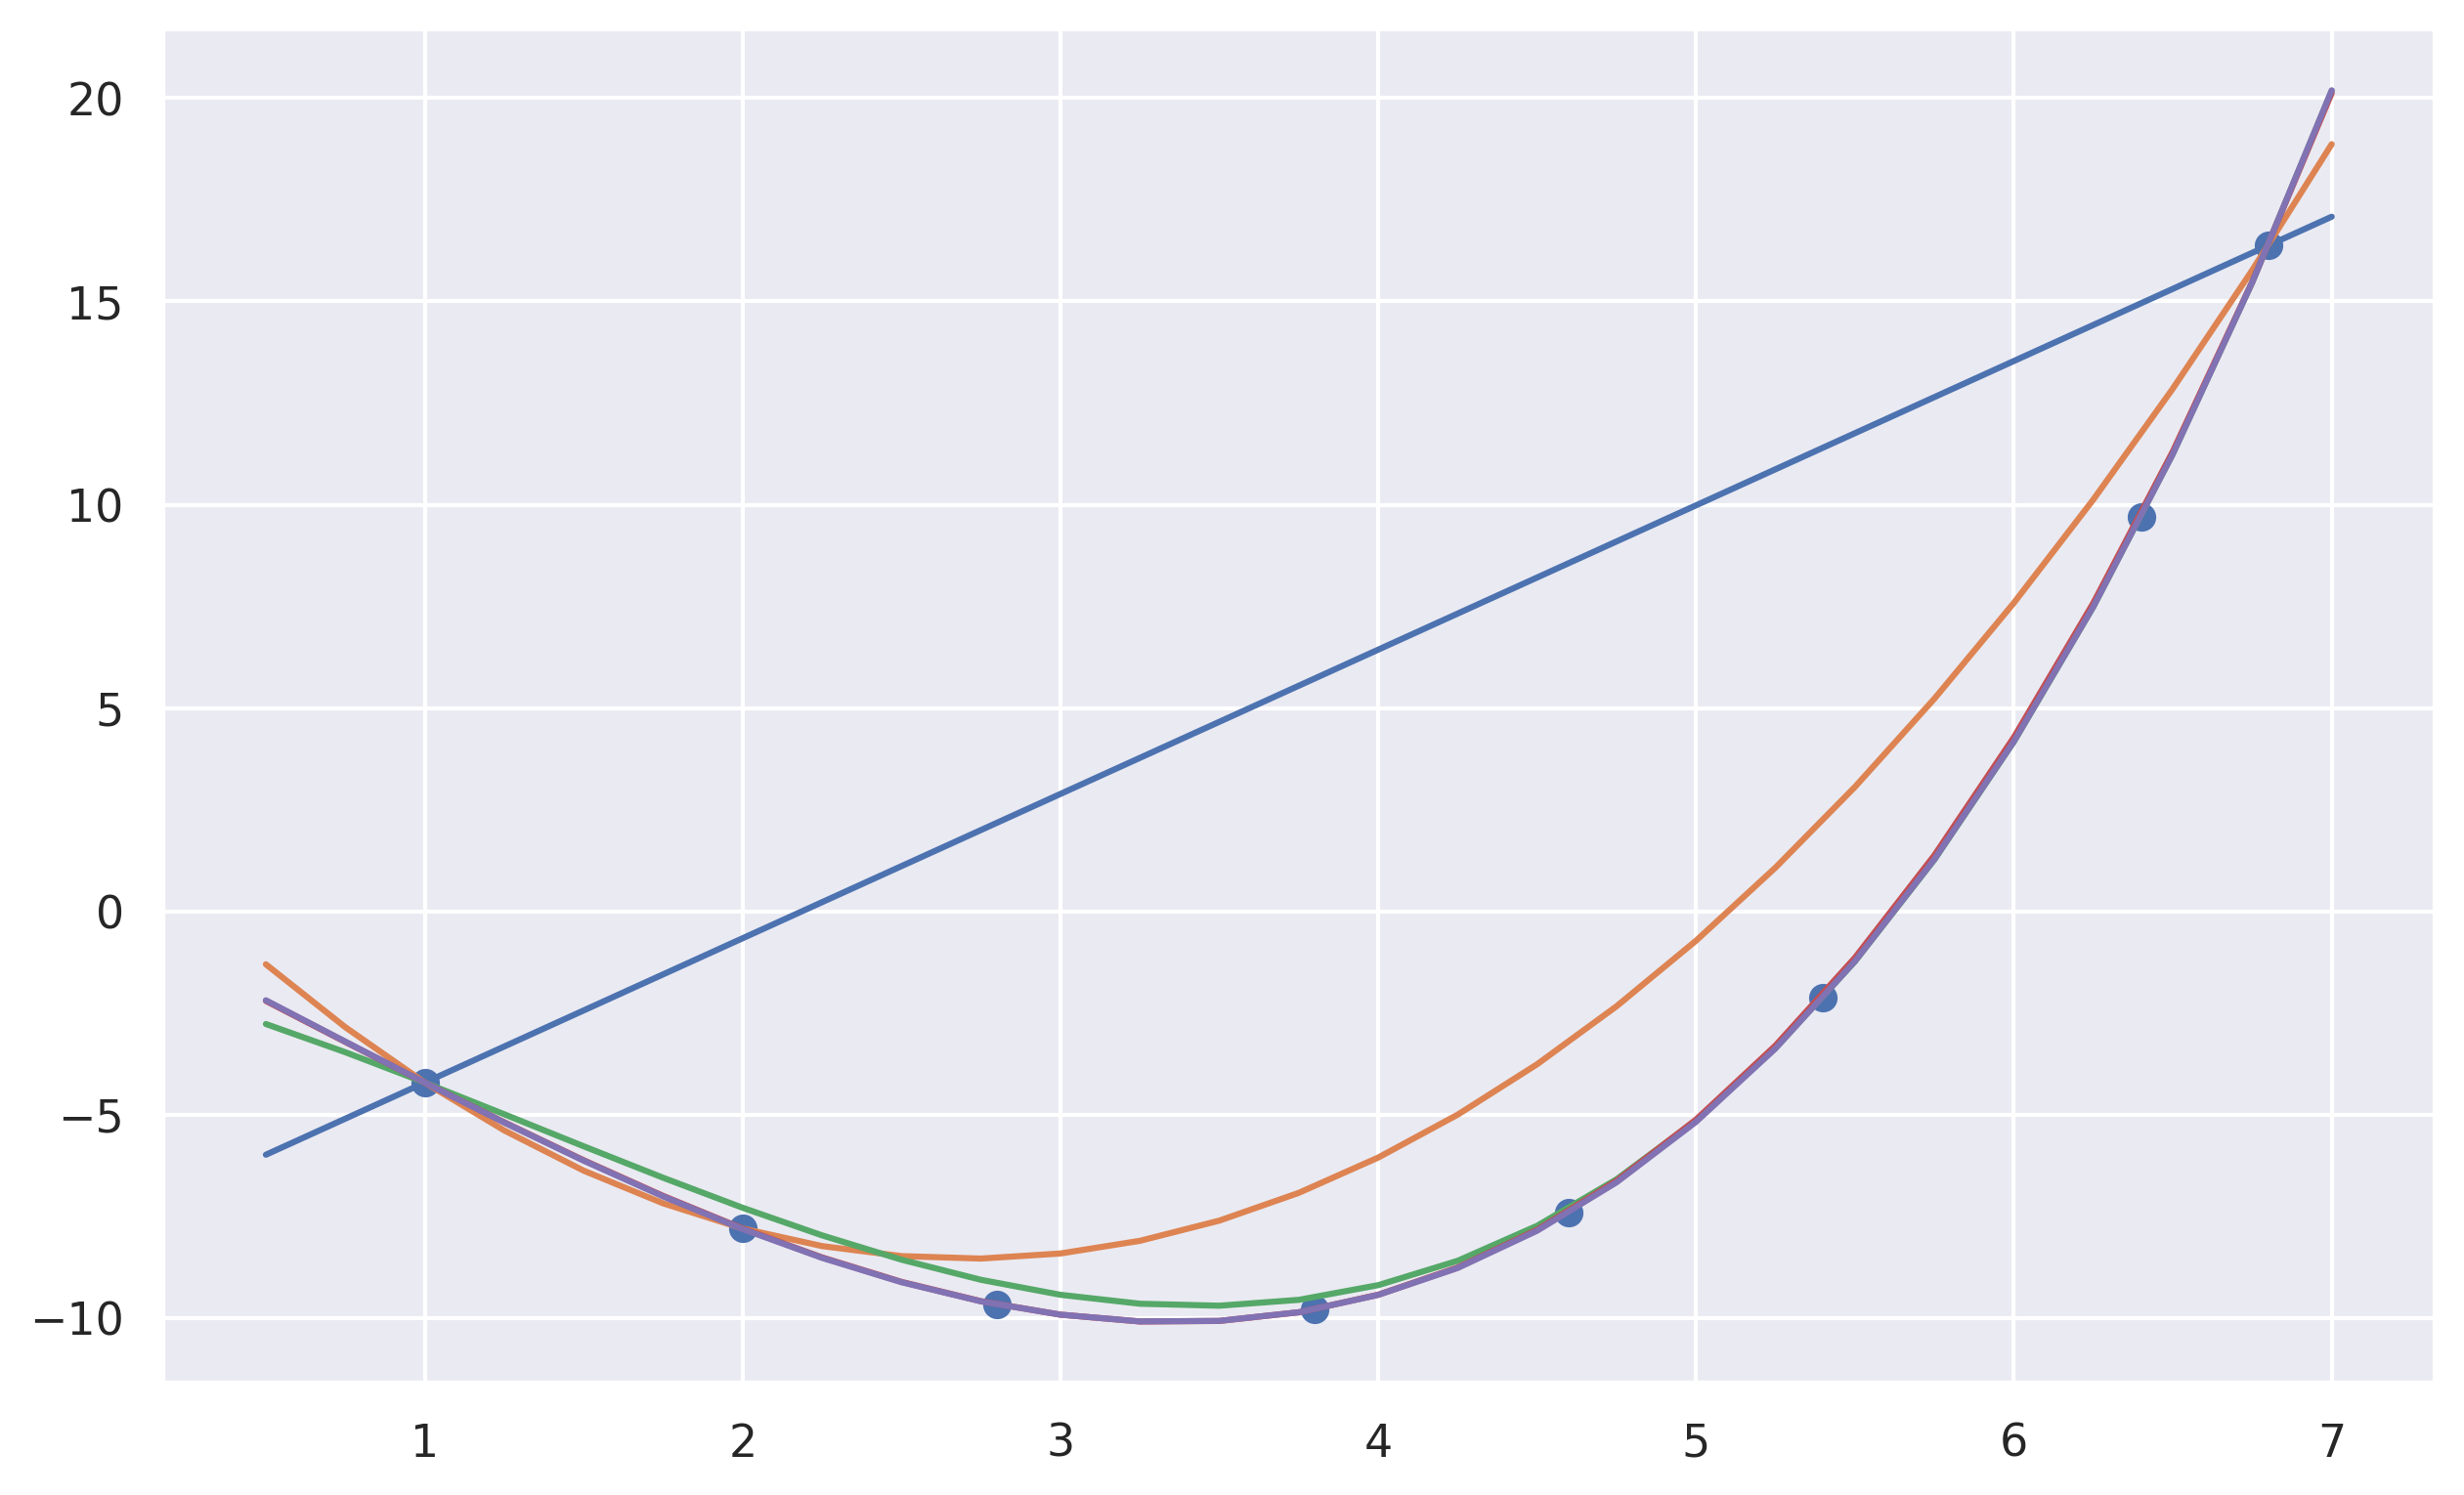

In [301]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,6), dpi=250)
x = np.linspace(.5, 7, 27)

for i in range(2,7): #iterate over polynomial orders

    x_homogenous = [lst for lst in x_multilength if len(lst) == i]
    y_homogenous = [lst for lst in y_multilength if len(lst) == i]
    #print(x_homogenous)
    
    remainders = []

    for j in range(0, len(x_homogenous)): #iterate over all possible subselections for each polynomial order

        x_case = x_homogenous[j]
        y_case = y_homogenous[j]
        #print(x_case)

        x_notincase = list(set(x_data) - set(x_case))
        case_interpolation = lagrange_interpolation(x_case, y_case)
        
        # if i==3:
        #     y = case_interpolation(x)
        #     plt.plot(x,y)

        errors = []
        
        for k in range(0, len(x_notincase)):
            
            error = remainder(x_notincase[k], case_interpolation, len(x_case) - 1, x_case)
            errors.append(error)


        maxerror = max(errors, key=abs)
        

        remainders.append(maxerror)

    minremainder = min(remainders, key=abs)

    print(x_homogenous[remainders.index(min(remainders))])

    best_interpolation = lagrange_interpolation(
        x_homogenous[remainders.index(min(remainders))],
        y_homogenous[remainders.index(min(remainders))]
    )

    y = best_interpolation(x)
    plt.plot(x,y)


plt.scatter(x_data, y_data)
plt.show